# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print("Jumlah baris =", df.shape[0])
print("Jumlah kolom =", df.shape[1])

Jumlah baris = 215
Jumlah kolom = 15


# Data Preparation and Data Cleaning

In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [3]:
df = df.drop(['sl_no', 'salary'], axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [7]:
df['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [5]:
k = df.groupby('gender').status.value_counts()
print(f'Jumlah mahasiswa yang ditempatkan dan tidak ditempatkan di setiap jenis kelamin:\n{k}\n')

Jumlah mahasiswa yang ditempatkan dan tidak ditempatkan di setiap jenis kelamin:
gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: count, dtype: int64



In [7]:
t = df.groupby('specialisation').status.value_counts(normalize=True)*100
print(f'Statistik Penempatan dari Berbagai Spesialisasi\n{t}\n')

Statistik Penempatan dari Berbagai Spesialisasi
specialisation  status    
Mkt&Fin         Placed        79.166667
                Not Placed    20.833333
Mkt&HR          Placed        55.789474
                Not Placed    44.210526
Name: proportion, dtype: float64



In [8]:
we = df.groupby('workex').status.value_counts(normalize=True)*100
print(f'Persentase mahasiswa yang ditempatkan dan tidak ditempatkan berdasarkan pengalaman kerja mereka:\n{we}')

Persentase mahasiswa yang ditempatkan dan tidak ditempatkan berdasarkan pengalaman kerja mereka:
workex  status    
No      Placed        59.574468
        Not Placed    40.425532
Yes     Placed        86.486486
        Not Placed    13.513514
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge object at 0x00000265F6B96B50>, <matplotlib.patches.Wedge object at 0x00000265FCE464D0>], [Text(-0.48861869663963653, 0.9855210648657812, 'Male'), Text(0.488618696639636, -0.9855210648657814, 'Female')], [Text(-0.26651928907616534, 0.5375569444722442, '65%'), Text(0.26651928907616507, -0.5375569444722443, '35%')])


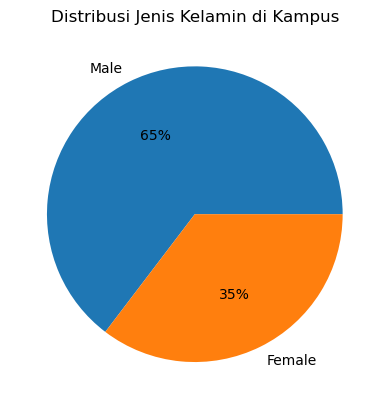

In [12]:
pie_gender=df.gender.value_counts(normalize=True)*100
plt.title('Distribusi Jenis Kelamin di Kampus')
lb=['Male','Female']
print(plt.pie(pie_gender,labels=lb,autopct='%.0f%%'))


In [13]:
gdf = df.groupby('gender').mean(numeric_only=True)
print(f'Statistik Poin Akademik berdasarkan jenis kelamin:')
gdf

Statistik Poin Akademik berdasarkan jenis kelamin:


,ssc_p,hsc_p,degree_p,etest_p,mba_p
gender,,,,,
F,68.310921,66.646842,68.090000,70.590658,64.643553
M,66.752518,66.161655,65.429856,72.926115,60.984892


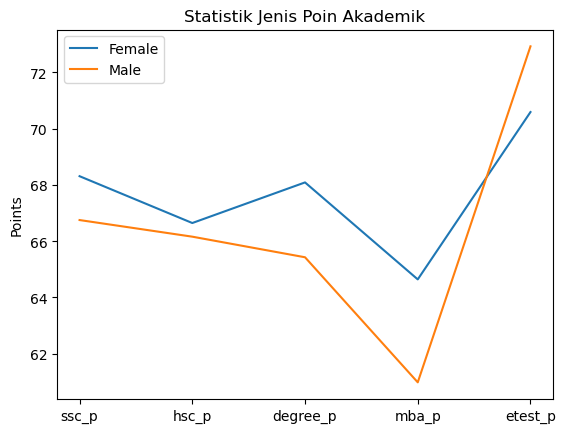

In [15]:
plt.title("Statistik Jenis Poin Akademik")
plt.ylabel("Points")
plt.plot(gdf[['ssc_p','hsc_p','degree_p','mba_p','etest_p']].iloc[0],label='Female')
plt.plot(gdf[['ssc_p','hsc_p','degree_p','mba_p','etest_p']].iloc[1],label='Male')
plt.legend()

# Data Preprocessing

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
# Perulangan untuk setiap kolom yang bertipe object atau kategori
for col in df.select_dtypes(include=['object']).columns:

# Menampilkan nama kolom dan nilai unique-nya
    print(f"{col}: {df[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [5]:
# Mengubah nilai kategori menjadi nilai numerik

df['gender'] = df['gender'].map({'F':1, 'M':0})
df['ssc_b'] = df['ssc_b'].map({'Central':1, 'Others':0})
df['hsc_b'] = df['hsc_b'].map({'Central':1, 'Others':0})
df['hsc_s'] = df['hsc_s'].map({'Commerce':2, 'Science':1, 'Arts':0})
df['degree_t'] = df['degree_t'].map({'Sci&Tech':2, 'Comm&Mgmt':1, 'Others':0})
df['workex'] = df['workex'].map({'Yes':1, 'No':0})
df['specialisation'] = df['specialisation'].map({'Mkt&HR':1, 'Mkt&Fin':0})
df['status'] = df['status'].map({'Placed':1, 'Not Placed':0})

In [6]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,1,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,1,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,2,73.30,1,0,96.8,0,55.50,1


In [ ]:
plt.figure(figsize = (15, 10))

ax=plt.subplot(221)
plt.boxplot(df['Nilai SMP'])
ax.set_title('Persentase SMP')

ax=plt.subplot(222)
plt.boxplot(df['Nilai SMA'])
ax.set_title('Persentase SMA')

ax=plt.subplot(223)
plt.boxplot(df['Nilai Sarjana'])
ax.set_title('Persentase Kuliah')

ax=plt.subplot(224)
plt.boxplot(df['Nilai Tes Kelayakan'])
ax.set_title('Persentase Kelayakan Kerja')

In [12]:
print(df['Nilai SMA'].describe())

count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: Nilai SMA, dtype: float64


In [9]:
Q1 = df['Nilai SMA'].quantile(0.25)
Q3 = df['Nilai SMA'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['Nilai SMA'] >= Q1 - 1.5 * IQR) & (df['Nilai SMA'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

In [10]:
print(df['Nilai SMA'].describe())

count    207.000000
mean      66.544783
std        9.690330
min       44.000000
25%       61.000000
50%       65.000000
75%       73.000000
max       91.000000
Name: Nilai SMA, dtype: float64


Text(0.5, 1.0, 'Persentase Kelayakan Kerja')

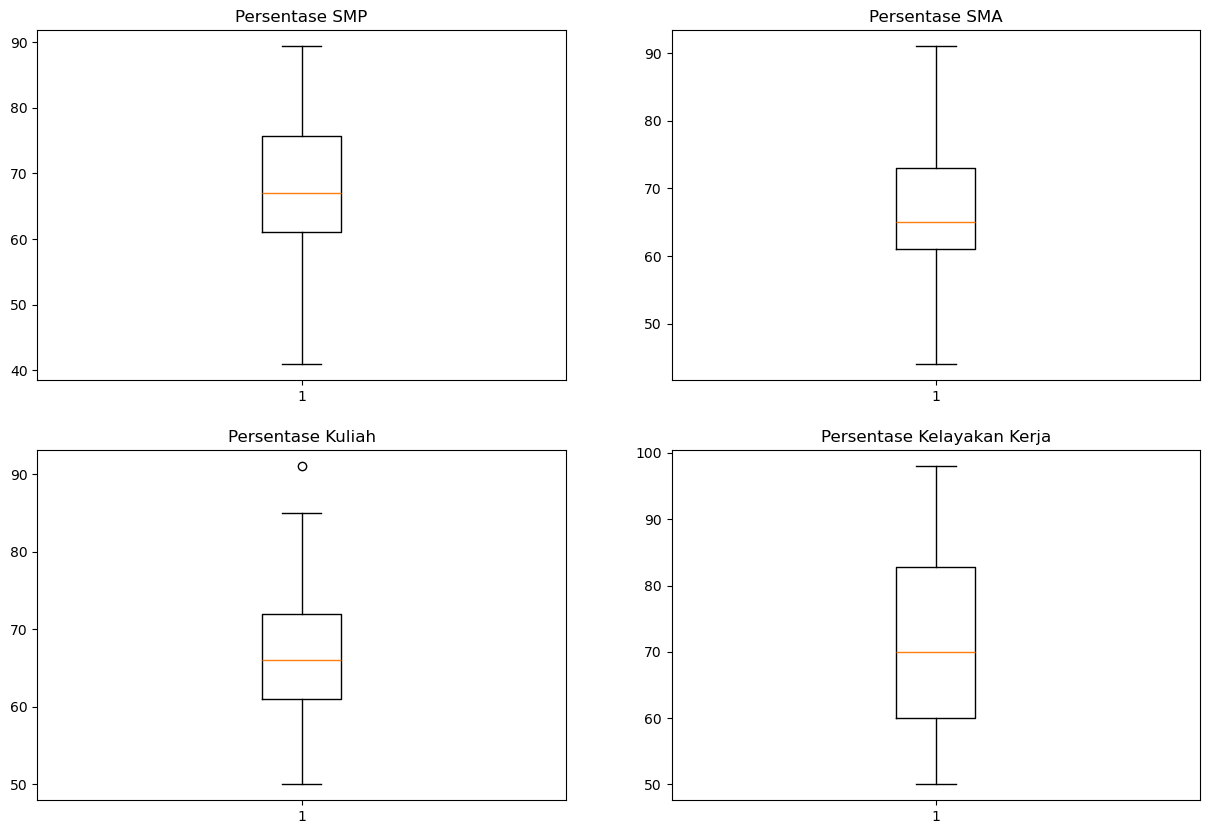

In [11]:
plt.figure(figsize = (15, 10))

ax=plt.subplot(221)
plt.boxplot(df['Nilai SMP'])
ax.set_title('Persentase SMP')

ax=plt.subplot(222)
plt.boxplot(df['Nilai SMA'])
ax.set_title('Persentase SMA')

ax=plt.subplot(223)
plt.boxplot(df['Nilai Sarjana'])
ax.set_title('Persentase Kuliah')

ax=plt.subplot(224)
plt.boxplot(df['Nilai Tes Kelayakan'])
ax.set_title('Persentase Kelayakan Kerja')

In [7]:
df.rename(columns={
    'gender': 'Gender',
    'ssc_p': 'Nilai SMP',
    'ssc_b': 'Wilayah SMP',
    'hsc_p': 'Nilai SMA',
    'hsc_b': 'Wilayah SMA',
    'hsc_s': 'Jurusan SMA',
    'degree_p': 'Nilai Sarjana',
    'degree_t': 'Bidang Sarjana',
    'workex': 'Pengalaman Kerja',
    'etest_p': 'Nilai Tes Kelayakan',
    'specialisation': 'Spesialisasi Magang',
    'mba_p': 'Nilai Magang',
    'status': 'Status'
}, inplace=True)

In [8]:
df.columns

Index(['Gender', 'Nilai SMP', 'Wilayah SMP', 'Nilai SMA', 'Wilayah SMA',
       'Jurusan SMA', 'Nilai Sarjana', 'Bidang Sarjana', 'Pengalaman Kerja',
       'Nilai Tes Kelayakan', 'Spesialisasi Magang', 'Nilai Magang', 'Status'],
      dtype='object')

In [12]:
correlation_matrix = df.corr()
df.corr()

,Gender,Nilai SMP,Wilayah SMP,Nilai SMA,Wilayah SMA,Jurusan SMA,Nilai Sarjana,Bidang Sarjana,Pengalaman Kerja,Nilai Tes Kelayakan,Spesialisasi Magang,Nilai Magang,Status
Gender,1.000000,0.068969,0.019429,0.021334,0.065945,-0.033729,0.173217,-0.110567,-0.085153,-0.084294,0.106160,0.300531,-0.090670
Nilai SMP,0.068969,1.000000,-0.116194,0.511472,-0.066996,-0.012464,0.538404,0.215745,0.175675,0.261993,-0.172536,0.388478,0.607889
Wilayah SMP,0.019429,-0.116194,1.000000,0.137013,0.605883,0.046695,-0.038070,-0.087035,0.040744,0.018991,0.051565,-0.083120,-0.037297
Nilai SMA,0.021334,0.511472,0.137013,1.000000,0.019548,0.245795,0.434206,0.009579,0.141025,0.245113,-0.241630,0.354823,0.491228
Wilayah SMA,0.065945,-0.066996,0.605883,0.019548,1.000000,0.018468,-0.067229,-0.122604,-0.038357,-0.039108,-0.002232,-0.090201,-0.016945
Jurusan SMA,-0.033729,-0.012464,0.046695,0.245795,0.018468,1.000000,0.038386,-0.250514,-0.067800,0.009518,-0.080070,-0.043186,0.047179
Nilai Sarjana,0.173217,0.538404,-0.038070,0.434206,-0.067229,0.038386,1.000000,0.180624,0.122648,0.224470,-0.218286,0.402364,0.479861
Bidang Sarjana,-0.110567,0.215745,-0.087035,0.009579,-0.122604,-0.250514,0.180624,1.000000,0.083505,0.005386,0.014103,0.121357,0.056572
Pengalaman Kerja,-0.085153,0.175675,0.040744,0.141025,-0.038357,-0.067800,0.122648,0.083505,1.000000,0.056735,-0.191174,0.168811,0.276060
Nilai Tes Kelayakan,-0.084294,0.261993,0.018991,0.245113,-0.039108,0.009518,0.224470,0.005386,0.056735,1.000000,-0.236315,0.218055,0.127639


In [9]:
df

,Gender,Nilai SMP,Wilayah SMP,Nilai SMA,Wilayah SMA,Jurusan SMA,Nilai Sarjana,Bidang Sarjana,Pengalaman Kerja,Nilai Tes Kelayakan,Spesialisasi Magang,Nilai Magang,Status
0,0,67.00,0,91.00,0,2,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,1,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,1,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,2,73.30,1,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,2,77.60,1,0,91.0,0,74.49,1
211,0,58.00,0,60.00,0,1,72.00,2,0,74.0,0,53.62,1
212,0,67.00,0,67.00,0,2,73.00,1,1,59.0,0,69.72,1
213,1,74.00,0,66.00,0,2,58.00,1,0,70.0,1,60.23,1


Memilih feature terbaik untuk pelatihan model

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.drop('Status', axis=1)  # Variabel fitur
y = df['Status']  # Variabel target

# Jumlah fitur yang ingin digunakan
k = 8

# Menggunakan SelectKBest untuk memilih k fitur teratas berdasarkan uji statistik ANOVA F-value
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Mendapatkan skor dan p-values dari fitur
scores = selector.scores_
pvalues = selector.pvalues_

# Mendapatkan indeks dari fitur terpilih
selected_feature = selector.get_support(indices=True)

# Menampilkan fitur yang terpilih dan skor fitur
print("Fitur terpilih:", X.columns[selected_feature])
print("Skor fitur:", scores[selected_feature])
print("P-values fitur:", pvalues[selected_feature])

Fitur terpilih: Index(['Gender', 'Nilai SMP', 'Nilai SMA', 'Nilai Sarjana', 'Pengalaman Kerja',
       'Nilai Tes Kelayakan', 'Spesialisasi Magang', 'Nilai Magang'],
      dtype='object')
Skor fitur: [  1.76561411 124.84250634  67.74518757  63.71917614  17.57165962
   3.52762696  14.27951129   1.26780979]
P-values fitur: [1.85347522e-01 4.11520104e-23 1.84921276e-14 8.80768214e-14
 4.05582310e-05 6.17203811e-02 2.04529907e-04 2.61445002e-01]


In [10]:
df = df.drop(['Wilayah SMP', 'Wilayah SMA', 'Jurusan SMA', 'Bidang Sarjana'], axis=1)
df.head()

,Gender,Nilai SMP,Nilai SMA,Nilai Sarjana,Pengalaman Kerja,Nilai Tes Kelayakan,Spesialisasi Magang,Nilai Magang,Status
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1


In [11]:
df.to_csv('campus-placement.csv', index=False)

In [15]:
X = df.drop('Status', axis=1)
y = df['Status']

In [16]:
X

,Gender,Nilai SMP,Nilai SMA,Nilai Sarjana,Pengalaman Kerja,Nilai Tes Kelayakan,Spesialisasi Magang,Nilai Magang
0,0,67.00,91.00,58.00,0,55.0,1,58.80
1,0,79.33,78.33,77.48,1,86.5,0,66.28
2,0,65.00,68.00,64.00,0,75.0,0,57.80
3,0,56.00,52.00,52.00,0,66.0,1,59.43
4,0,85.80,73.60,73.30,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,0,91.0,0,74.49
211,0,58.00,60.00,72.00,0,74.0,0,53.62
212,0,67.00,67.00,73.00,1,59.0,0,69.72
213,1,74.00,66.00,58.00,0,70.0,1,60.23


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = svm.SVC()
svm.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [20]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svm.predict(X_test)
y_pred4 = dtc.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gbc.predict(X_test)

# Evaluasi Model

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Menampilkan nilai akurasi setiap model 
score1 = accuracy_score(y_test, y_pred1)
score2 = accuracy_score(y_test, y_pred2)
score3 = accuracy_score(y_test, y_pred3)
score4 = accuracy_score(y_test, y_pred4)
score5 = accuracy_score(y_test, y_pred5)
score6 = accuracy_score(y_test, y_pred6)

print(score1, score2, score3, score4, score5, score6)

0.8604651162790697 0.7906976744186046 0.7674418604651163 0.8372093023255814 0.813953488372093 0.8372093023255814


In [22]:
# Menampilkan hasil klasifikasi untuk model algoritma Logistic Regression sebagai skor tertinggi
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43



In [23]:
accuracy_train = lr.score(X_train, y_train)
accuracy_test  = lr.score(X_test, y_test)

print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 88.37 %
Akurasi Model (Test)  : 86.05 %


In [24]:
final_data = pd.DataFrame({'Models':['LR', 'KNN', 'SVM', 'DTC', 'RF', 'GB'],
             'Accuracy Score':[score1*100,
                    score2*100,
                    score3*100,
                    score4*100,
                    score5*100,
                    score6*100]})

In [25]:
# Menampilkan Models dan Accuracy Score-nya
final_data

,Models,Accuracy Score
0,LR,86.046512
1,KNN,79.069767
2,SVM,76.744186
3,DTC,83.720930
4,RF,81.395349
5,GB,83.720930


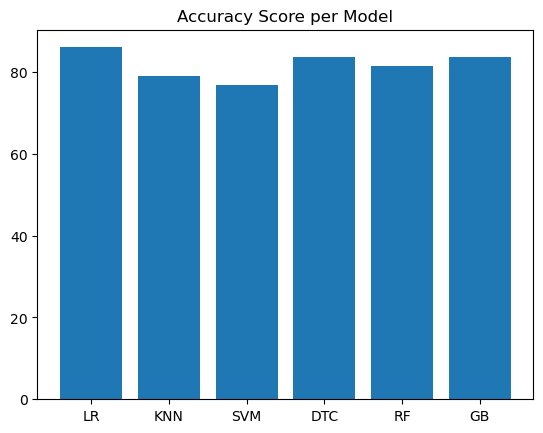

In [26]:
# Visualisasi Accuracy Score untuk masing-masing model algoritma menggunakan diagram batang / barplot
plt.bar(final_data['Models'], final_data['Accuracy Score'])
plt.title('Accuracy Score per Model')
plt.show()

# Model Testing

In [27]:
# Menguji model yang sudah dilatih dengan memprediksi data baru dari inputan user
df_test = pd.DataFrame(data={
    "Gender"                : [0],
    "Nilai SMP"             : [50.00],
    "Nilai SMA"             : [54.00],
    "Nilai Sarjana"         : [58.00],
    "Pengalaman Kerja"      : [0],
    "Nilai Tes Kelayakan"   : [70.00],
    "Spesialisasi Magang"   : [1],
    "Nilai Magang"          : [59.00]    
})

df_test[0:1]

,Gender,Nilai SMP,Nilai SMA,Nilai Sarjana,Pengalaman Kerja,Nilai Tes Kelayakan,Spesialisasi Magang,Nilai Magang
0,0,50.0,54.0,58.0,0,70.0,1,59.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               215 non-null    int64  
 1   Nilai SMP            215 non-null    float64
 2   Nilai SMA            215 non-null    float64
 3   Nilai Sarjana        215 non-null    float64
 4   Pengalaman Kerja     215 non-null    int64  
 5   Nilai Tes Kelayakan  215 non-null    float64
 6   Spesialisasi Magang  215 non-null    int64  
 7   Nilai Magang         215 non-null    float64
 8   Status               215 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 15.2 KB


In [29]:
# Memanggil model untuk memprediksi data yang baru
pred_test = lr.predict(df_test[0:1])

# If statement untuk menampilkan masing-masing hasil output prediksi
if pred_test[0] == 0:
    print('Maaf, Anda tidak mendapatkan penempatan kerja, tetap semangat!')
else:
    print('Selamat, Anda berpeluang untuk mendapatkan penempatan kerja.')

Maaf, Anda tidak mendapatkan penempatan kerja, tetap semangat!


In [41]:
# Menyimpan model menggunakan joblib
import pickle

pickle.dump(lr,open('rfmodel.pkl','wb'))